
In this program, we define two functions:

create_gaussian_kernel(size, sigma): This function creates a Gaussian kernel of specified size and sigma. The kernel is created using the formula of the Gaussian distribution and is then normalized to ensure that the sum of all elements in the kernel is 1.

apply_gaussian_blur(image, kernel): This function applies the Gaussian blur to the image using the cv2.filter2D() function. It takes the input image and the Gaussian kernel as arguments and returns the blurred image.

In the main part of the program:
1. we load an input image using cv2.imread() and then, 
2. create a Gaussian kernel using create_gaussian_kernel() with the desired kernel size and sigma. 
4. Finally, we apply the Gaussian blur to the image using apply_gaussian_blur() 
5. and display the original and blurred images using matplotlib

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:

def gaussian2d(x, y, sigma, size):
    kernel = (1/(2*np.pi*sigma**2)) * \
            np.exp(\
            -((x-(size-1)/2)**2 + \
            (y-(size-1)/2)**2)/\
            (2*sigma**2))
    return kernel

def create_gaussian_kernel(size, sigma):
    """Create a Gaussian kernel"""
    # numpy.fromfunction(function, shape, **kwargs)
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * \
                             np.exp(\
                                 -((x-(size-1)/2)**2 + \
                                   (y-(size-1)/2)**2)/\
                                    (2*sigma**2)), (size, size))
    
    kernel /= np.sum(kernel)
    return kernel

def apply_gaussian_blur(image, kernel):
    """Apply Gaussian blur to the image"""
    blurred_image = cv2.filter2D(image, -1, kernel)
    return blurred_image

In [3]:
# implementing the fromfunction()  function 
myarray = np.fromfunction(lambda x, y: x + y, (3, 3), dtype=int)
print(myarray)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [5]:

# Load the image
image = cv2.imread('real_image.png', 0)

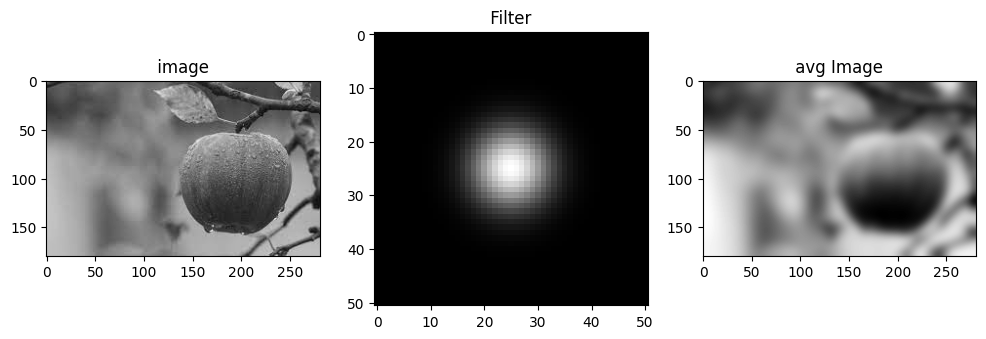

In [11]:
# Create a Gaussian kernel
kernel_size = 51
sigma = 5
gaussian_kernel = create_gaussian_kernel(kernel_size, sigma)

# Apply Gaussian blur to the image
blurred_image = apply_gaussian_blur(image, gaussian_kernel)

# Create a figure placeholder
fig = plt.figure(figsize=(12, 5))

# show original image on a subplot
fig.add_subplot(131)
plt.title(' image ')
plt.set_cmap('gray')
plt.imshow(image)

fig.add_subplot(132)
plt.title(' Filter ')
plt.set_cmap('gray')
plt.imshow(gaussian_kernel)

fig.add_subplot(133)
plt.title(' avg Image ')
plt.set_cmap('gray')
plt.imshow(blurred_image)
